In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def assymetric_laplace_pdf(x, scale, k):
    return scale/(k + (k ** -1)) * np.exp(-x * scale * np.sign(x) * (k ** np.sign(x)) )


def assymetric_laplace_cdf(x, scale, k):
    if x < 0:
        return np.exp(x*scale/k) * (k**2) / (1 + k**2) 
    else:
        return 1 - np.exp(-x*scale*k) / (1 + k**2) 

In [12]:
def assymetric_laplace_pdf_trans(y, scale, k):
    x = -np.log(y)
    return scale/(k + (k ** -1)) * np.exp(-x * scale * np.sign(x) * (k ** np.sign(x)))/y

In [16]:
scale = 10
kappa = 0.5

In [17]:
xvals = np.linspace(-2, 2, 1000)

pdf = np.array([assymetric_laplace_pdf(x, scale, kappa) for x in xvals])
cdf = np.array([assymetric_laplace_cdf(x, scale, kappa) for x in xvals])

Text(0.5, 1.0, 'CDF')

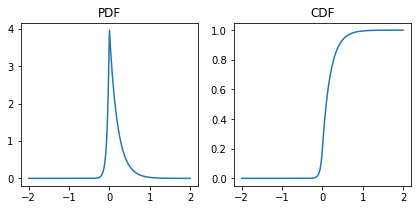

In [18]:
plt.figure(figsize=(7, 3))
plt.subplot(121)
plt.plot(xvals, pdf)
plt.title('PDF')
plt.subplot(122)
plt.plot(xvals, cdf)
plt.title('CDF')

In [10]:
assymetric_laplace_cdf(0, 10, 0.5)

0.19999999999999996

In [11]:
assymetric_laplace_cdf(0.15, 10, 0.5)

0.6221067578071883

In [6]:
assymetric_laplace_cdf(-0.15, 10, 0.5)

0.00995741367357279

In [ ]:
assymetric_laplace_cdf(0, 10, 0.5)

In [ ]:
1-assymetric_laplace_cdf(0.5, 10, 0.5)

In [ ]:
yvals = np.linspace(-1, 1, 1000)

pdf = np.array([assymetric_laplace_pdf(y, 5, 0.5) for y in xvals])

In [ ]:
plt.plot(100*yvals, pdf)
plt.title('PDF')
plt.xlabel('Reduction in R')

In [ ]:
import pymc3 as pm

In [ ]:
gamma = pm.Gamma.dist(1/8, 1) 

In [ ]:
xvals = np.linspace(-2, 2, 1000)
pdf_vals = np.exp(gamma.logp(xvals).eval())

In [ ]:
plt.subplot(121)
pdf = np.array([assymetric_laplace_pdf(x, 0.5, 0.5) for x in xvals])
plt.plot(xvals - np.log(1.05)/8, pdf_vals)
plt.ylim([0, 5])
plt.subplot(122)
plt.plot(xvals, pdf)
plt.ylim([0, 1])

In [ ]:
f

In [12]:
from epimodel.pymc3_distributions.asymmetric_laplace import AsymmetricLaplace

Set Theano Environmental Variables for Parallelisation


In [13]:
x = AsymmetricLaplace.dist(10, 0.5)

In [22]:
samples = x.random(size=1000000).eval()

In [23]:
ts = 100*(1-np.exp(-samples))

In [30]:
import arviz as az

In [42]:
plt.figure(figsize=(3, 3), dpi=300)
az.plot_kde(ts)

plt.xlabel('Percentage reduction in $R$')
plt.xlim([-50, 100])
plt.ylim([0, 0.04])
xtick_locs = [-50, -25, 0, 25, 50, 75, 100]
plt.xticks(xtick_locs, [f'{l}%' for l in xtick_locs])
plt.yticks([])
plt.ylabel('density')
plt.title('NPI Effectiveness Prior')

Text(0.5, 1.0, 'NPI Effectiveness Prior')

0.498431

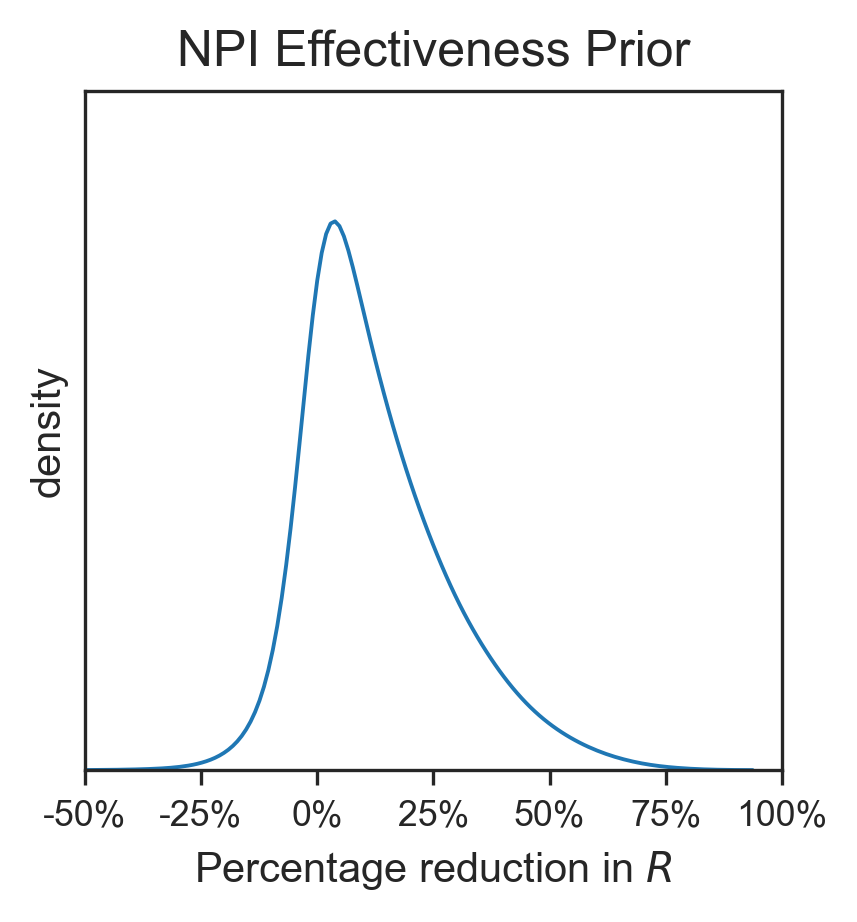

In [43]:
np.mean(np.abs(ts) < 10)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import pymc3 as pm

In [7]:
with pm.Model() as mdl:
    x = AsymmetricLaplace('lol', 10, 0.5)

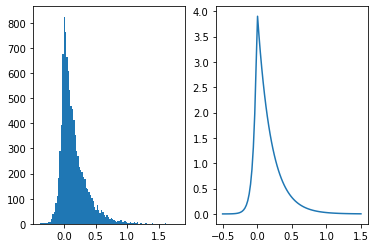

In [9]:
x = AsymmetricLaplace.dist(10, 0.5)
plt.subplot(121)
plt.hist(samples, bins=100);
plt.subplot(122)
xvals = np.linspace(-0.5, 1.5, 100)
pdf = np.exp(x.logp(xvals).eval())
plt.plot(xvals, pdf)

In [ ]:
pdf